In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Read the CSV file into a DataFrame
teams_stats = pd.read_csv('../basketballPlayoffs/teams_stats_encoded.csv')

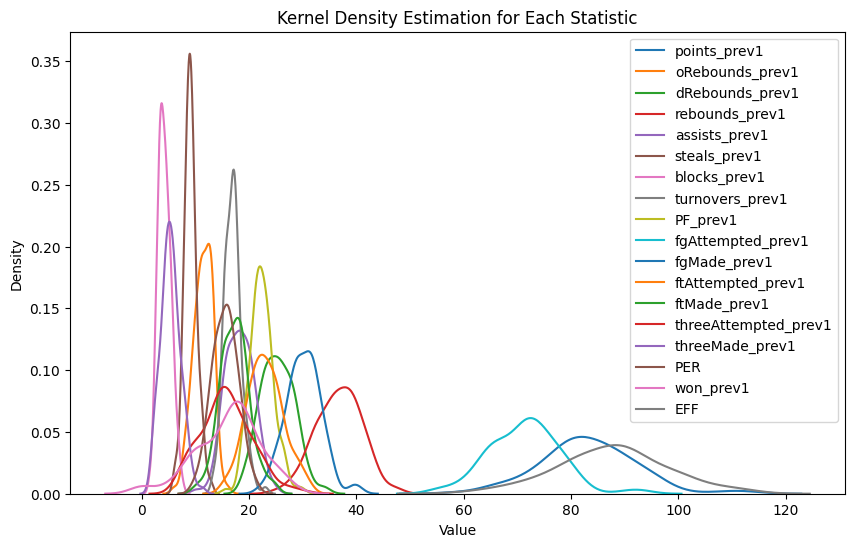

In [3]:
plt.figure(figsize=(10, 6))

columns = [col for col in teams_stats.columns if col not in ['tmID', 'year', 'confID', 'playoff']]
for column in columns:
    sb.kdeplot(teams_stats[column], label=column)

plt.xlabel('Value')
plt.title('Kernel Density Estimation for Each Statistic')
plt.legend()
plt.show()

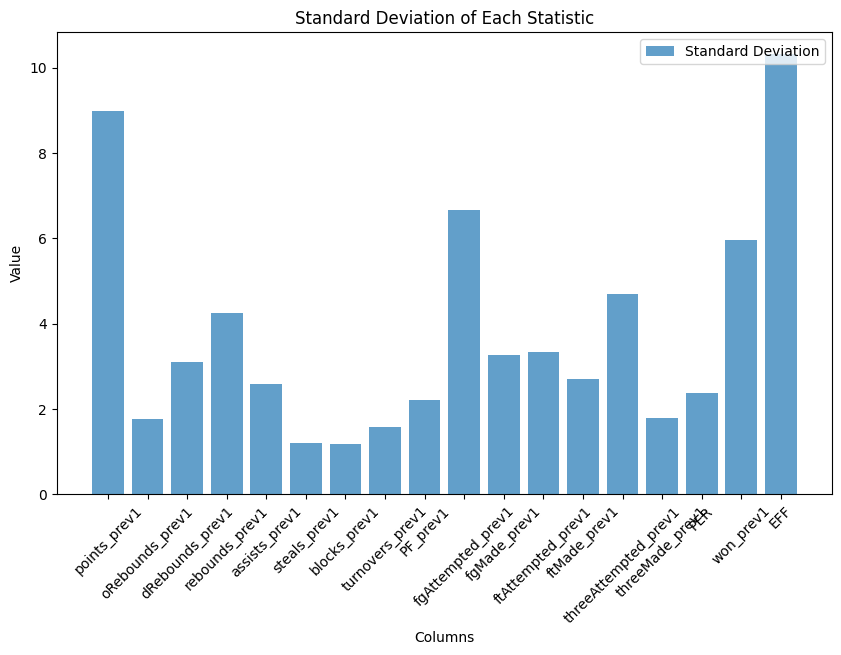

In [4]:
columns = [col for col in teams_stats.columns if col not in ['tmID', 'year', 'confID', 'playoff']]
std_deviation = []

for column in columns:
    std_deviation.append(teams_stats[column].std())

plt.figure(figsize=(10, 6))
plt.bar(columns, std_deviation, label='Standard Deviation', alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Value')
plt.title('Standard Deviation of Each Statistic')
plt.legend(loc='upper right')
plt.show()

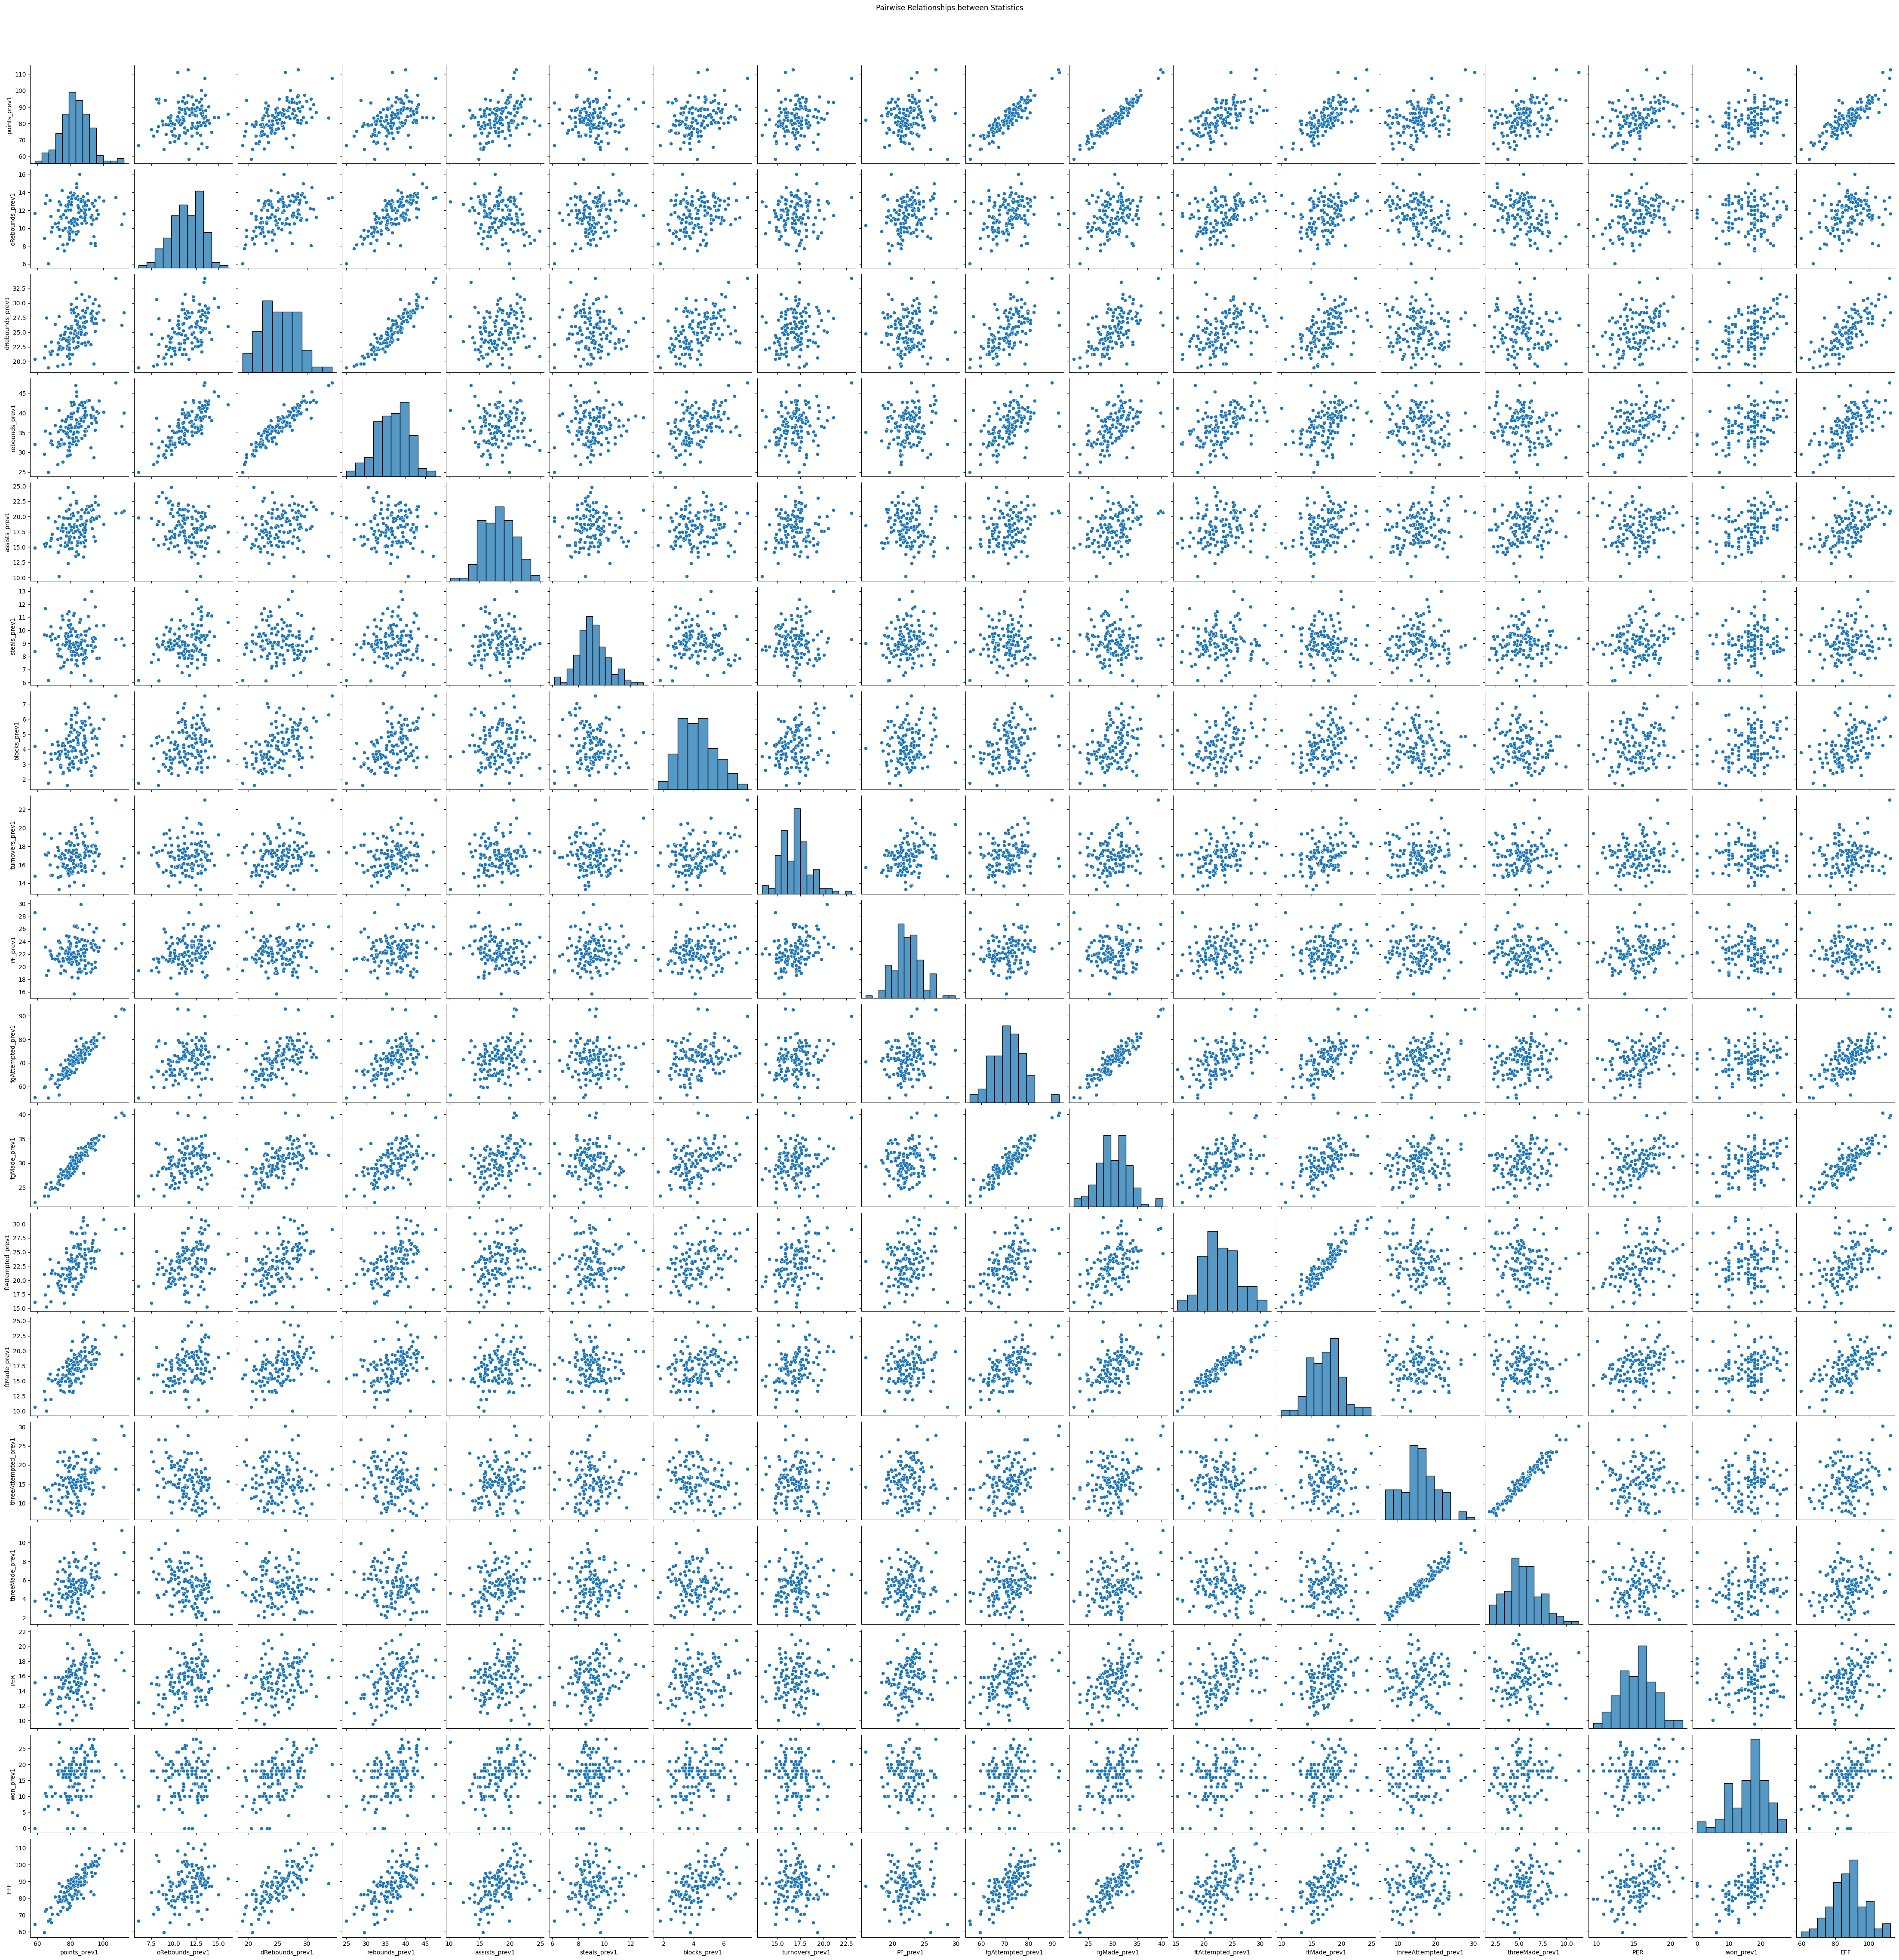

In [5]:
columns = [col for col in teams_stats.columns if col not in ['tmID', 'year', 'confID', 'playoff']]
sb.pairplot(teams_stats[columns])
plt.suptitle("Pairwise Relationships between Statistics", y=1.02)
plt.show()

{'points_prev1': 1705718047110.6855, 'oRebounds_prev1': 271206954824.3092, 'dRebounds_prev1': 271206954824.33463, 'rebounds_prev1': 1025298394149.8053, 'assists_prev1': 1296505348974.1262, 'steals_prev1': 1296505348974.067, 'blocks_prev1': 1296505348974.0957, 'turnovers_prev1': -1296505348974.116, 'PF_prev1': -0.011019477203832461, 'fgAttempted_prev1': -1296505348974.082, 'fgMade_prev1': 478079952700.86, 'ftAttempted_prev1': -1296505348974.0544, 'ftMade_prev1': 887292650837.4196, 'threeAttempted_prev1': 0.0994781864062709, 'threeMade_prev1': -409212698136.8238, 'PER': 0.016539209788453153, 'won_prev1': 0.01570974322470777, 'EFF': -1296505348974.0864}


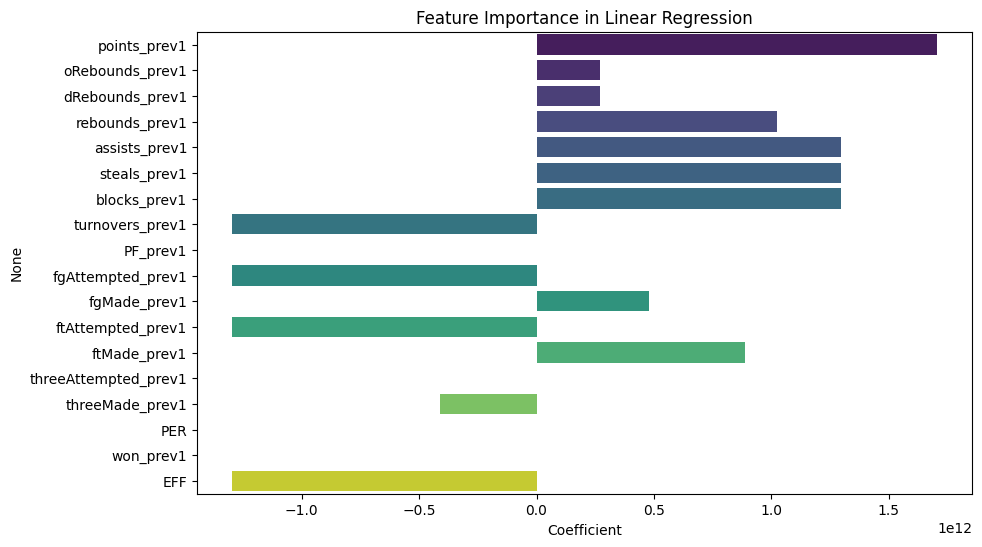

In [6]:
from sklearn.linear_model import LinearRegression

X = teams_stats.drop(['tmID', 'year', 'confID', 'playoff'], axis=1)
y = teams_stats['playoff']

model = LinearRegression()
model.fit(X, y)

feature_importance = pd.Series(model.coef_, index=X.columns)

lrRatingMult = {}
for feature, importance in zip(X.columns, feature_importance):
    lrRatingMult[feature] = importance
print(lrRatingMult)

plt.figure(figsize=(10, 6))
sb.barplot(x=feature_importance.values, y=feature_importance.index, hue=feature_importance.index, palette="viridis", legend=False)
plt.xlabel('Coefficient')
plt.title('Feature Importance in Linear Regression')
plt.show()

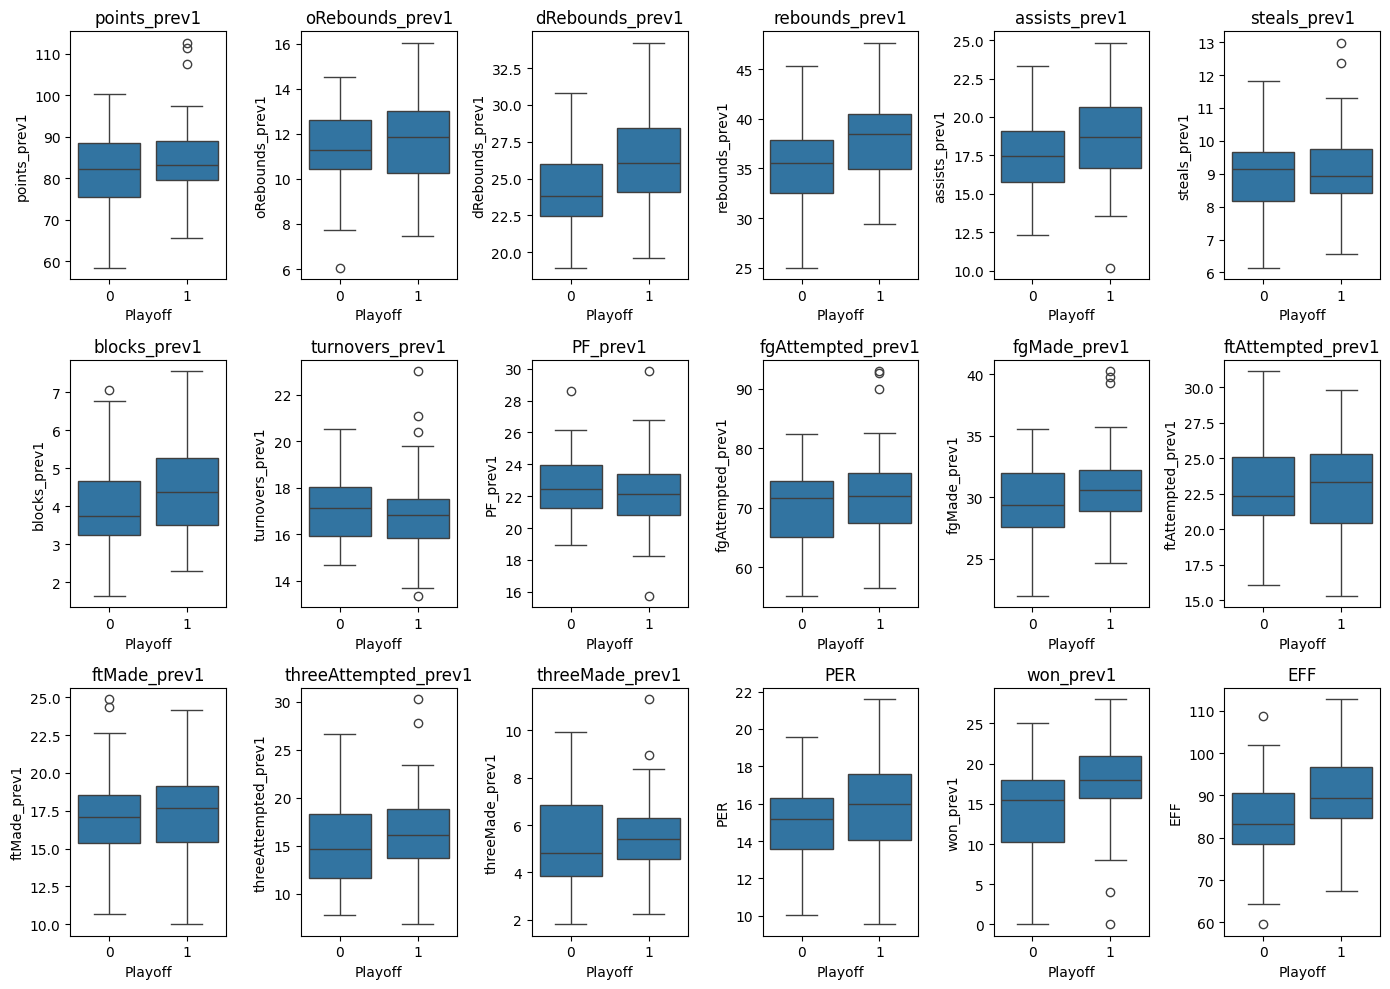

In [9]:
plt.figure(figsize=(14, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 6, i)
    sb.boxplot(x='playoff', y=column, data=teams_stats)
    plt.xlabel('Playoff')
    plt.ylabel(column)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

                          tmID      year  points_prev1  oRebounds_prev1  \
tmID                  1.000000 -0.044970      0.066228        -0.044861   
year                 -0.044970  1.000000      0.452929         0.043616   
points_prev1          0.066228  0.452929      1.000000         0.180888   
oRebounds_prev1      -0.044861  0.043616      0.180888         1.000000   
dRebounds_prev1      -0.008273  0.417550      0.554501         0.494745   
rebounds_prev1       -0.024574  0.322305      0.478850         0.773923   
assists_prev1        -0.006716  0.282342      0.372319        -0.255423   
steals_prev1         -0.038732  0.021876     -0.005286         0.283208   
blocks_prev1          0.083389  0.056270      0.327578         0.296067   
turnovers_prev1       0.110411  0.150448      0.228990         0.084749   
PF_prev1              0.049542  0.070011      0.121775         0.270636   
fgAttempted_prev1     0.047677  0.474175      0.917697         0.286698   
fgMade_prev1          0.0

<Axes: >

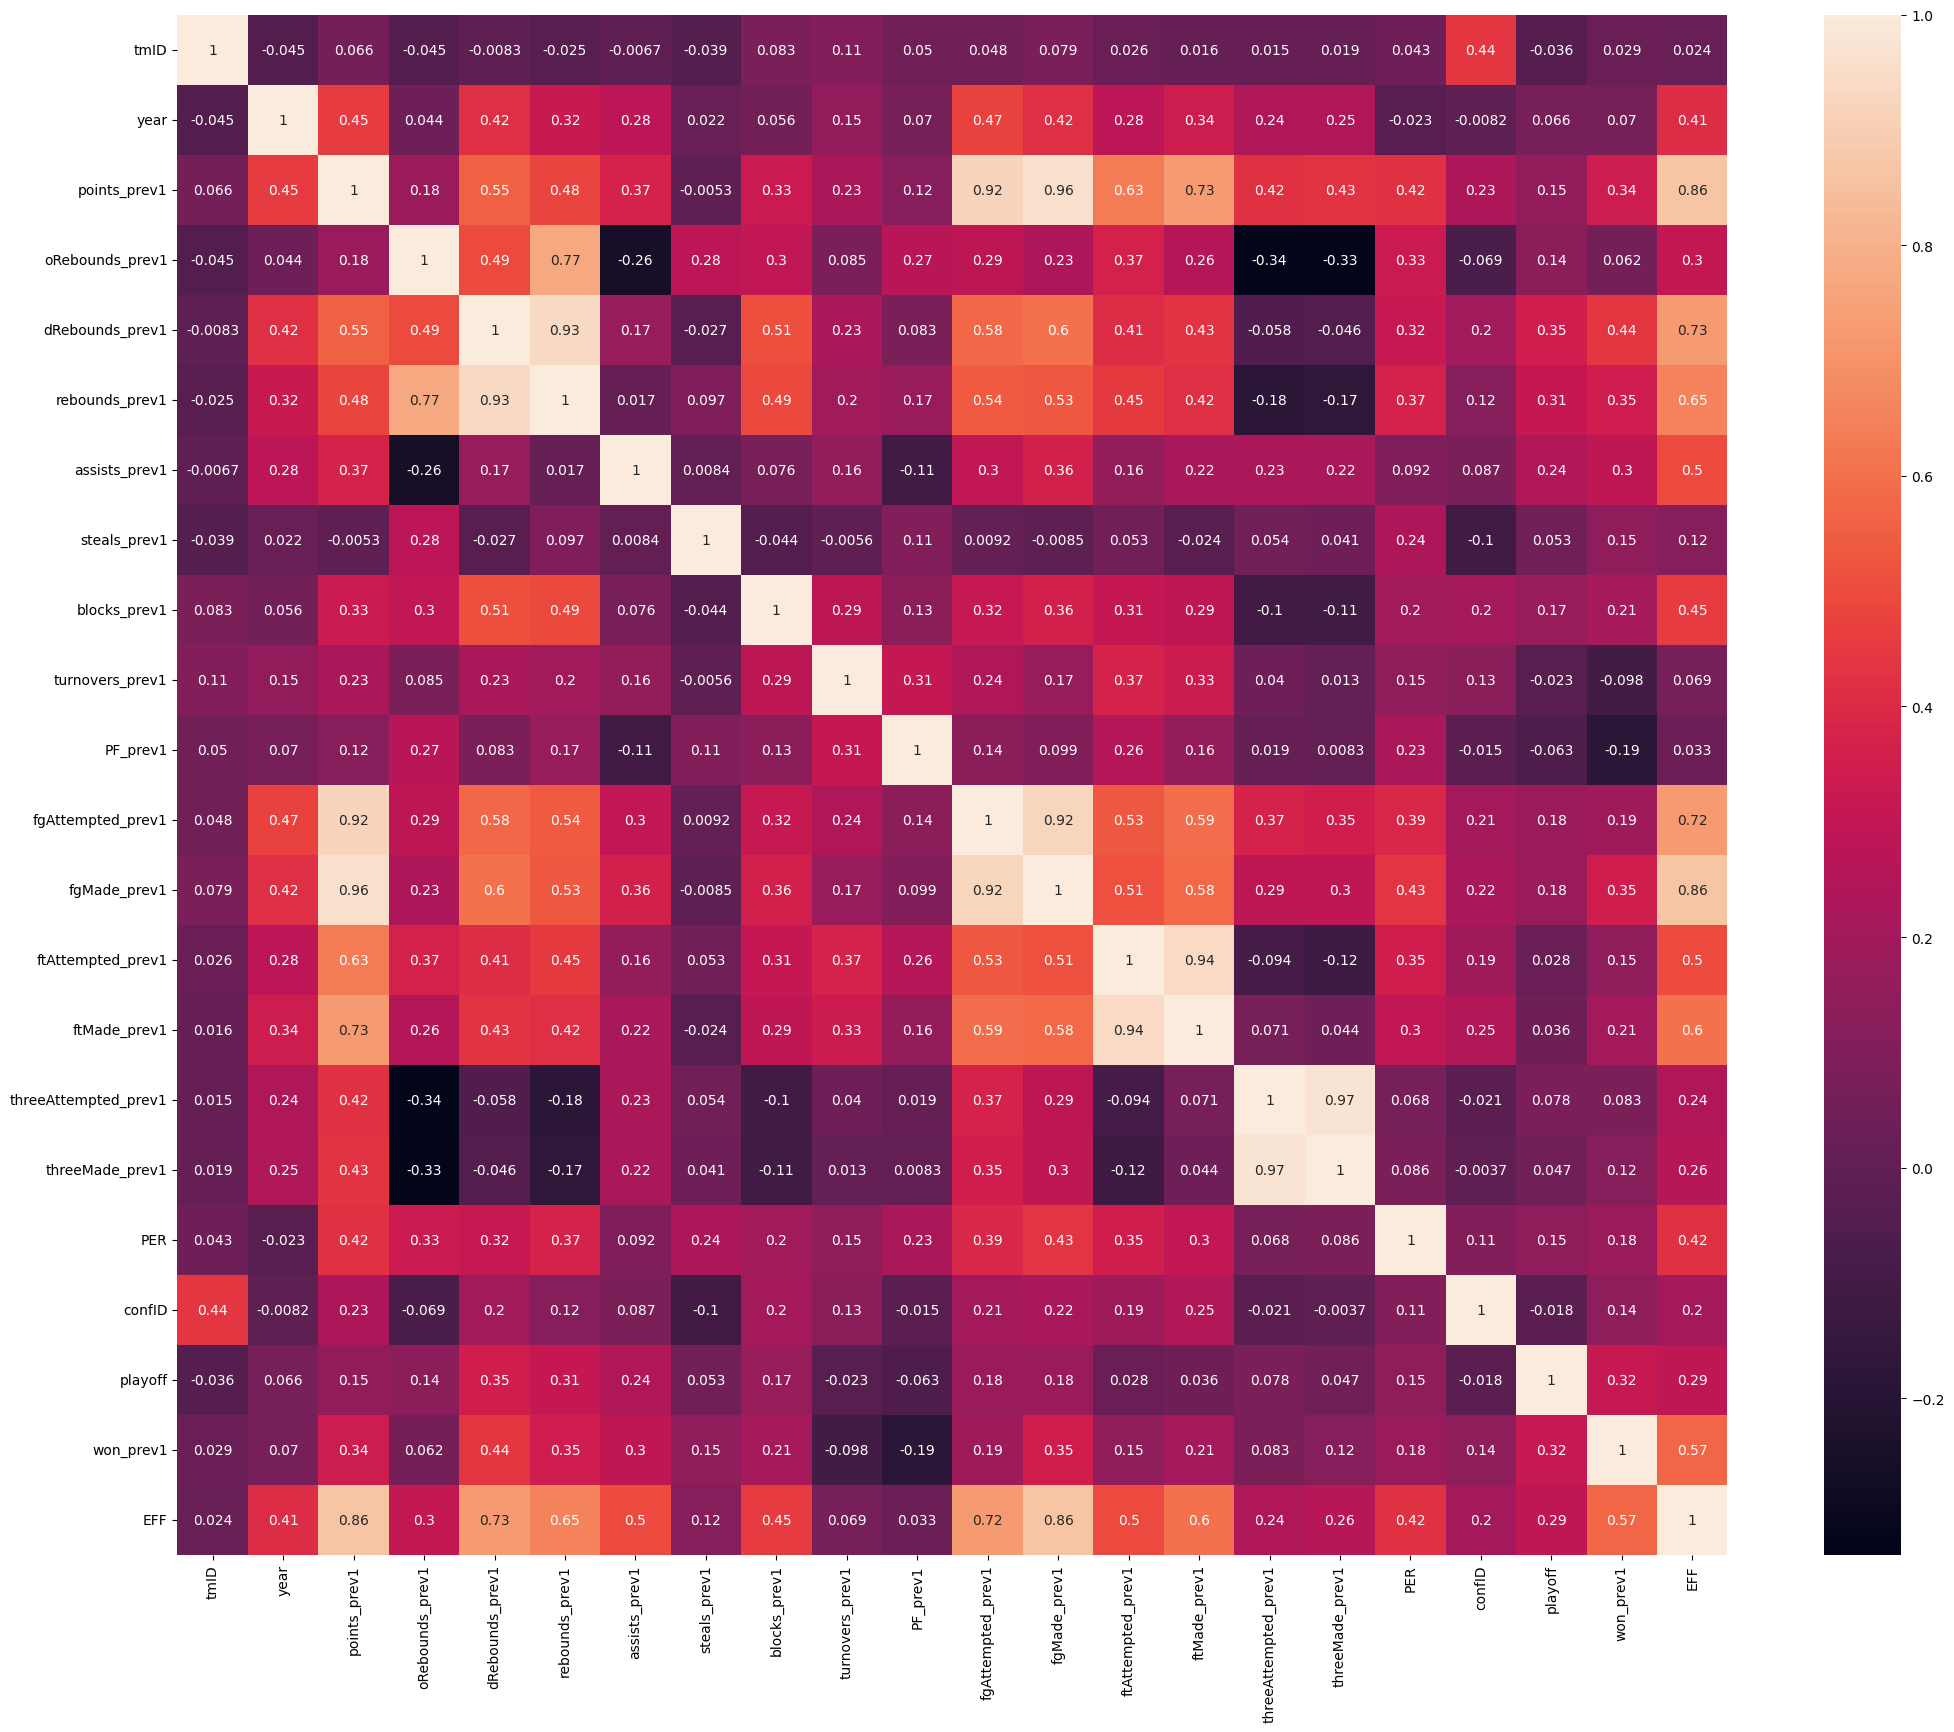

In [8]:
# HEATHMAP SHOWING CORRELATION BETWEEN INGAME STATS AND PLAYOFF QUALIFICATION
print(teams_stats.corr())
plt.subplots(figsize=(25,20))
sb.heatmap(teams_stats.corr(),annot=True)